In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
def sample_spherical(npoints, ndim, radius):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    vec *= radius
    return vec

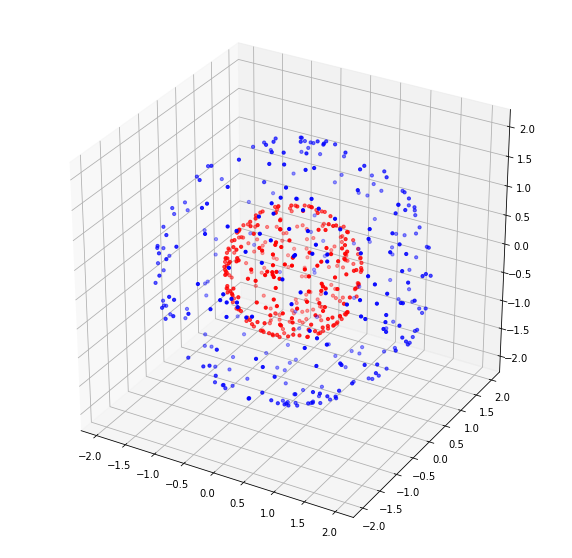

In [4]:
xi, yi, zi = sample_spherical(300,3,1)
xj, yj, zj = sample_spherical(300,3,2)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.scatter(xi, yi, zi, s=10, c='r')
ax.scatter(xj, yj, zj, s=10, c='b')
plt.show()

In [5]:
x = np.concatenate((xi,xj))
y = np.concatenate((yi,yj))
z = np.concatenate((zi,zj))
X = np.concatenate((x.reshape(-1,1),y.reshape(-1,1),z.reshape(-1,1)),axis=1)

In [6]:
def project(data, k):
    U,sig,Vt = np.linalg.svd(data.T)
    return np.matmul(data, U[:, :k])

### 1D projection 

In [7]:
X_tilda = project(X,1)

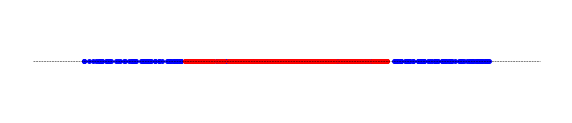

In [8]:
plt.figure(figsize=(10,2))
plt.scatter(X_tilda[300:], np.ones(300), s=15, c='b')
plt.scatter(X_tilda[:300], np.ones(300), s=15, c='r')
plt.plot((-2.5,2.5),(1,1),'k--',linewidth=0.5)
plt.axis('off')
plt.show()

### 2D projection 

In [9]:
X_tilda = project(X,2)

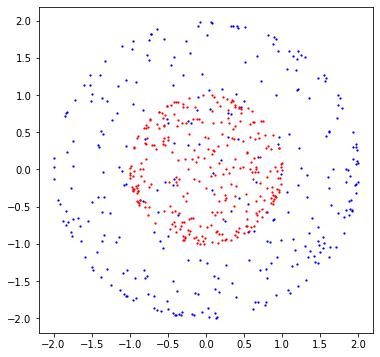

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(X_tilda[300:,0], X_tilda[300:,1], s=1.5, c='b')
plt.scatter(X_tilda[:300,0], X_tilda[:300,1], s=1.5, c='r')
plt.show()

### Feature engineering 

In [11]:
X_new = np.concatenate((X,(X[:,0]**2).reshape(-1,1),
                        (X[:,1]**2).reshape(-1,1),
                        (X[:,2]**2).reshape(-1,1)), 
                       axis = 1)

In [12]:
X_tilda = project(X_new,1)

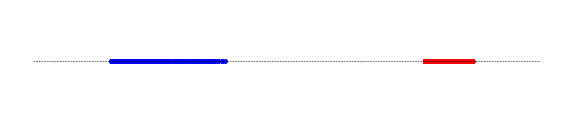

In [15]:
plt.figure(figsize=(10,2))
plt.scatter(X_tilda[300:], np.ones(300), s=15, c='b')
plt.scatter(X_tilda[:300], np.ones(300), s=15, c='r')
plt.plot((-3,0),(1,1),'k--',linewidth=0.5)
plt.axis('off')
plt.show()